# View regional CPI data for Brazil

In [1]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/550 Final Project/DSCI550 Final Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt

# Load the data from the CSV file
cpi_data_path = 'Cluster analysis/data/CPI_Brazil_Monthly.csv'
cpi_data = pd.read_csv(cpi_data_path)

# Display the first few rows of the dataframe to understand its structure
cpi_data.head()

,Month,Consumer Price Index
0,2000M1,8.853113
1,2000M2,7.862087
2,2000M3,6.923308
3,2000M4,6.774717
4,2000M5,6.465620


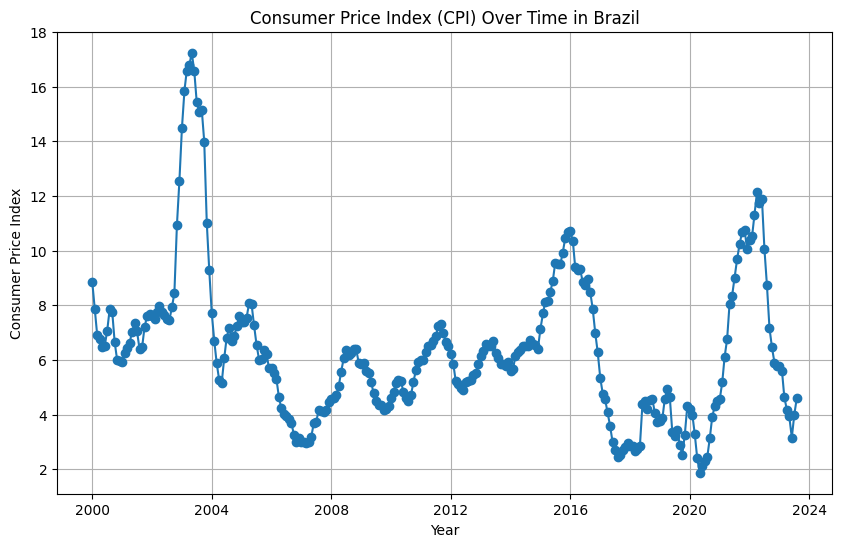

In [3]:
cpi_data['Month'] = pd.to_datetime(cpi_data['Month'], format='%YM%m')

plt.figure(figsize=(10, 6))
plt.plot(cpi_data['Month'], cpi_data['Consumer Price Index'], marker='o')
plt.title('Consumer Price Index (CPI) Over Time in Brazil')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.show()

## Capture CPI data within the time frame of the order

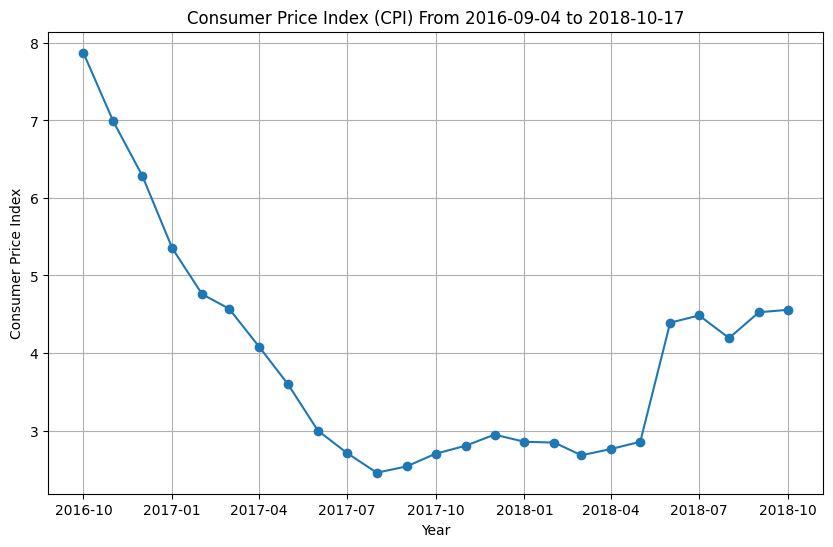

In [4]:
cpi_data['Month'] = pd.to_datetime(cpi_data['Month'], format='%YM%m')
filtered_cpi_data = cpi_data[(cpi_data['Month'] >= '2016-09-04') & (cpi_data['Month'] <= '2018-10-17')]


plt.figure(figsize=(10, 6))
plt.plot(filtered_cpi_data['Month'], filtered_cpi_data['Consumer Price Index'], marker='o')
plt.title('Consumer Price Index (CPI) From 2016-09-04 to 2018-10-17')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.show()

In [5]:
orders_data = pd.read_csv('data/olist/olist_orders_dataset.csv')
min_date = orders_data['order_purchase_timestamp'].min()
max_date = orders_data['order_purchase_timestamp'].max()
print(f"Order date range: {min_date} to {max_date}")

Order date range: 2016-09-04 21:15:19 to 2018-10-17 17:30:18


# Construct feature vectors

#### total order price

In [6]:
import pandas as pd

# Load the order payments dataset
payments_dataset_path = 'Cluster analysis/new_data/filtered_order_payments_dataset.csv'
payments_df = pd.read_csv(payments_dataset_path)

# Display the first few rows of the dataframe to understand its structure
payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# Calculating the total price for each order
total_price_per_order = payments_df.groupby('order_id')['payment_value'].sum().reset_index()

# Renaming the column for clarity
total_price_per_order.rename(columns={'payment_value': 'total_price'}, inplace=True)

# Display the first few rows of the new dataframe
total_price_per_order.head()

,order_id,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [8]:
# Path for the new file
output_file_path = 'Cluster analysis/order_feature_data/total_price_per_order.csv'

# Save the dataframe to a CSV file
total_price_per_order.to_csv(output_file_path, index=False)

output_file_path


'Cluster analysis/order_feature_data/total_price_per_order.csv'

#### Quantity of goods ordered

In [9]:
# Load the order items dataset
items_dataset_path = 'Cluster analysis/new_data/final_filtered_order_items_dataset.csv'
items_df = pd.read_csv(items_dataset_path)

# Display the first few rows of the dataframe to understand its structure
items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# Calculating the number of items per order
items_count_per_order = items_df.groupby('order_id').size().reset_index(name='items_count')

# Display the first few rows of the new dataframe
items_count_per_order.head()


,order_id,items_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [11]:
# Path for the new file
output_file_path = 'Cluster analysis/order_feature_data/items_count_per_order.csv'

# Save the dataframe to a CSV file
items_count_per_order.to_csv(output_file_path, index=False)

output_file_path


'Cluster analysis/order_feature_data/items_count_per_order.csv'

#### Payment liquidity

0 if you paid without a credit card, 2 if you paid with a credit card: 1 if the installment amount is greater than 5, and 1 if it is between 1 and 4   
This index is built up to explain the flexibility of payments used by the customers.

In [12]:
# Function to determine payment liquidity
def determine_payment_liquidity(row):
    if row['payment_type'] != 'credit_card':
        return 0
    elif 1 <= row['payment_installments'] <= 4:
        return 1
    else:
        return 2

# Apply the function to the dataframe
payments_df['payment_liquidity'] = payments_df.apply(determine_payment_liquidity, axis=1)

# Creating a new dataframe with order_id and payment_liquidity
payment_liquidity_df = payments_df[['order_id', 'payment_liquidity']]

# Since an order can have multiple payment types, we take the maximum value to represent the order
# This is based on the assumption that the most "illiquid" payment type dominates
payment_liquidity_df = payment_liquidity_df.groupby('order_id')['payment_liquidity'].max().reset_index()

# Display the first few rows of the new dataframe
payment_liquidity_df.head()


,order_id,payment_liquidity
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,2
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [13]:
# Path for the new file
payment_liquidity_file_path = 'Cluster analysis/order_feature_data/payment_liquidity_per_order.csv'

# Save the dataframe to a CSV file
payment_liquidity_df.to_csv(payment_liquidity_file_path, index=False)

payment_liquidity_file_path


'Cluster analysis/order_feature_data/payment_liquidity_per_order.csv'

#### Enjoy consumer goods

First determine whether a good changes significantly with the CPI: If the difference between the maximum monthly sales of the good and the minimum monthly sales is greater than or equal to 3 during the decline in the CPI, the good is considered to have changed significantly with the CPI.

If an order contains goods that vary significantly with CPI, the enjoyment value of the order is 1, and the enjoyment value of the order is 0.

'Enjoy' here can be depicted as 'goods for enjoyment', that is goods purchased not for daily use, but for enjoyment(cosmetics, luxury products, etc.)

In [14]:
# Load the orders dataset
orders_dataset_path = 'Cluster analysis/new_data/final_filtered_orders_dataset.csv'
orders_df = pd.read_csv(orders_dataset_path)

# Load the products dataset
products_dataset_path = 'data/olist/olist_products_dataset.csv'
products_df = pd.read_csv(products_dataset_path)

# Display the first few rows of each dataframe to understand their structure
orders_df.head(), products_df.head()


(                           order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 
   order_status order_purchase_timestamp    order_approved_at  \
 0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
 2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
 3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
 4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
 
   order_delivered_carrier_date order_delivered_customer_date  \
 0          2017-10-04 19:55:00           2017-10-10 21:25:13   
 1          2018-07-26 14:31:00 

In [15]:
# Convert order_purchase_timestamp to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Define the date range
start_date = '2016-10-01'
end_date = '2017-08-31'

# Filter orders within the date range
filtered_orders_df = orders_df[(orders_df['order_purchase_timestamp'] >= start_date) &
                               (orders_df['order_purchase_timestamp'] <= end_date)]

# Display the first few rows of the filtered dataframe
filtered_orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [16]:
# Load the order items dataset again as we will need it for the next step
order_items_path = 'Cluster analysis/new_data/final_filtered_order_items_dataset.csv'
order_items_df = pd.read_csv(order_items_path)

# Merging the filtered orders with order items to get the product_id for each order
merged_df = pd.merge(filtered_orders_df, order_items_df, on='order_id', how='inner')

# Extracting the month from the order_purchase_timestamp
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')


In [17]:
# Group by product_id and month, then count the number of sales for each product each month
monthly_sales_per_product = merged_df.groupby(['product_id', 'month']).size().reset_index(name='monthly_sales')

# Finding the max and min monthly sales for each product
product_sales_max_min = monthly_sales_per_product.groupby('product_id')['monthly_sales'].agg(['max', 'min']).reset_index()

# Display the first few rows of the result
product_sales_max_min.head()

,product_id,max,min
0,001b72dfd63e9833e8c02742adf472e3,3,1
1,001c5d71ac6ad696d22315953758fa04,1,1
2,00210e41887c2a8ef9f791ebc780cc36,6,1
3,002159fe700ed3521f46cfcf6e941c76,1,1
4,0021a87d4997a48b6cef1665602be0f5,1,1


In [18]:
# Calculating the difference between the max and min monthly sales
product_sales_max_min['sales_diff'] = product_sales_max_min['max'] - product_sales_max_min['min']

# Display the first few rows of the dataframe with the sales difference
product_sales_max_min.head()
# Counting the frequency of each sales difference value


,product_id,max,min,sales_diff
0,001b72dfd63e9833e8c02742adf472e3,3,1,2
1,001c5d71ac6ad696d22315953758fa04,1,1,0
2,00210e41887c2a8ef9f791ebc780cc36,6,1,5
3,002159fe700ed3521f46cfcf6e941c76,1,1,0
4,0021a87d4997a48b6cef1665602be0f5,1,1,0


In [19]:
sales_diff_counts = product_sales_max_min['sales_diff'].value_counts().sort_index()

# Display the counts for each sales difference value
sales_diff_counts

0     8383
1      789
2      318
3      152
4      118
5       76
6       40
7       19
8       23
9       17
10      13
11      10
12       1
13       2
14       3
15       4
16       6
17       4
18       4
19       1
20       3
22       1
38       1
44       1
58       2
71       1
Name: sales_diff, dtype: int64

In [20]:
# Merging the products dataset with the product_sales_max_min dataset
merged_product_sales = pd.merge(products_df, product_sales_max_min, on='product_id', how='left')

# Function to determine the related_with_cpi value
def determine_related_with_cpi(row):
    if pd.isna(row['sales_diff']):
        return 0
    elif row['sales_diff'] >= 3:
        return 1
    else:
        return 0

# Apply the function to determine related_with_cpi
merged_product_sales['related_with_cpi'] = merged_product_sales.apply(determine_related_with_cpi, axis=1)

# Display the first few rows of the merged dataframe
merged_product_sales.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,max,min,sales_diff,related_with_cpi
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,NaN,NaN,NaN,0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,NaN,NaN,NaN,0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,NaN,NaN,NaN,0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,NaN,NaN,NaN,0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,NaN,NaN,NaN,0


In [21]:
# Merging the order items dataset with the merged_product_sales dataset to get the related_with_cpi for each product in each order
order_items_cpi_merged = pd.merge(order_items_df,
                                  merged_product_sales[['product_id', 'related_with_cpi']],
                                  on='product_id',
                                  how='left')

# Filling NaN values in related_with_cpi with 0 (assuming products not present in merged_product_sales have related_with_cpi = 0)
order_items_cpi_merged['related_with_cpi'].fillna(0, inplace=True)

# Calculating the enjoyment value for each order
def calculate_enjoyment(group):
    # Filtering the products with related_with_cpi = 1
    cpi_products = group[group['related_with_cpi'] == 1]
    if cpi_products.empty:
        return 0
    else:
        return 1

enjoyment_per_order = order_items_cpi_merged.groupby('order_id').apply(calculate_enjoyment).reset_index(name='enjoyment')

# Display the first few rows of the result
enjoyment_per_order.head()


,order_id,enjoyment
0,00010242fe8c5a6d1ba2dd792cb16214,0
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0


In [22]:
# Path for the new file
enjoyment_per_order_file_path = 'Cluster analysis/order_feature_data/enjoyment_per_order.csv'

# Save the dataframe to a CSV file
enjoyment_per_order.to_csv(enjoyment_per_order_file_path, index=False)

enjoyment_per_order_file_path

'Cluster analysis/order_feature_data/enjoyment_per_order.csv'

#### feature vector table

The final feature vector table includes enjoyment, items_count, payment_liquidity, total_price and time. The first 4 features are used for cluster analysis.

In [23]:
# Load the four datasets
enjoyment_path = 'Cluster analysis/order_feature_data/enjoyment_per_order.csv'
items_count_path = 'Cluster analysis/order_feature_data/items_count_per_order.csv'
payment_liquidity_path = 'Cluster analysis/order_feature_data/payment_liquidity_per_order.csv'
total_price_path = 'Cluster analysis/order_feature_data/total_price_per_order.csv'

enjoyment_df = pd.read_csv(enjoyment_path)
items_count_df = pd.read_csv(items_count_path)
payment_liquidity_df = pd.read_csv(payment_liquidity_path)
total_price_df = pd.read_csv(total_price_path)

# Merging the four datasets on 'order_id'
merged_features_df = enjoyment_df.merge(items_count_df, on='order_id', how='outer')\
                                .merge(payment_liquidity_df, on='order_id', how='outer')\
                                .merge(total_price_df, on='order_id', how='outer')

# Display the first few rows of the merged dataframe
merged_features_df.head()


,order_id,enjoyment,items_count,payment_liquidity,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,0,1,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,0,1,1,259.83
2,000229ec398224ef6ca0657da4fc703e,0,1,2,216.87
3,00024acbcdf0a6daa1e931b038114c75,0,1,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,1,1,218.04


In [24]:
# Reload the original orders dataset to add the order time attribute
orders_df = pd.read_csv(orders_dataset_path)

# Selecting only order_id and order_purchase_timestamp from the orders dataset
orders_time_df = orders_df[['order_id', 'order_purchase_timestamp']]

# Merging the combined features dataframe with the orders time dataframe
merged_features_with_time_df = pd.merge(merged_features_df, orders_time_df, on='order_id', how='left')

# Display the first few rows of the new merged dataframe
merged_features_with_time_df.head()


,order_id,enjoyment,items_count,payment_liquidity,total_price,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,0,1,1,72.19,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,0,1,1,259.83,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,0,1,2,216.87,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,0,1,1,25.78,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,1,1,218.04,2017-02-04 13:57:51


# Clustering analysis

#### Elbow method to determine K value

<ipython-input-25-b2f9d6d00a1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

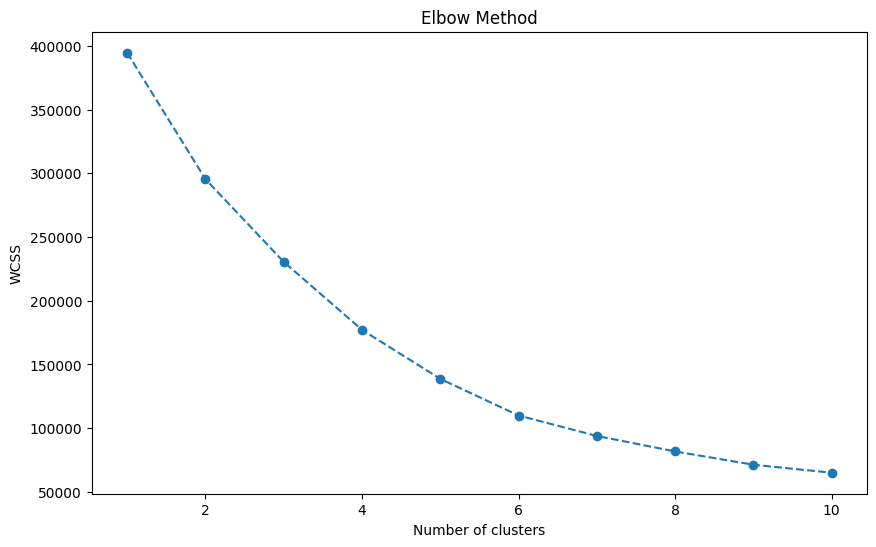

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the features for clustering
features_for_clustering = merged_features_with_time_df[['enjoyment', 'items_count', 'payment_liquidity', 'total_price']]

# Handling missing values (if any) by filling them with 0
features_for_clustering.fillna(0, inplace=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### k-means cluster analysis with k = 5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Assume merged_features_with_time_df is your DataFrame with the data shown in the image
# Example: merged_features_with_time_df = pd.DataFrame(data_from_image)

# Selecting the necessary columns for clustering
features = merged_features_with_time_df[['enjoyment', 'items_count', 'payment_liquidity', 'total_price']]
# Handling missing values by replacing them with 0
features.fillna(0, inplace=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters, starting with 5 as per the Elbow plot
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to our dataframe
merged_features_with_time_df['cluster'] = clusters

# Convert the 'order_purchase_timestamp' to datetime
merged_features_with_time_df['order_purchase_timestamp'] = pd.to_datetime(merged_features_with_time_df['order_purchase_timestamp'])

# Extract year and month from the timestamp for grouping
merged_features_with_time_df['year_month'] = merged_features_with_time_df['order_purchase_timestamp'].dt.to_period('M')

# Group by year_month and cluster to get the count of orders per cluster each month
monthly_cluster_sizes = merged_features_with_time_df.groupby(['year_month', 'cluster']).size().unstack(fill_value=0)

# Plot the data
monthly_cluster_sizes.plot(kind='line', marker='o', figsize=(14, 7))  # Changed to 'line' and added 'marker'
plt.title('Monthly Change in Cluster Sizes')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Cluster')
plt.grid(True)  # Adding grid for better readability
plt.show()

# Describing each cluster (optional, if you want to print the descriptions)
cluster_description = merged_features_with_time_df.groupby('cluster')[['enjoyment', 'items_count', 'payment_liquidity', 'total_price']].mean()
cluster_sizes = merged_features_with_time_df['cluster'].value_counts().sort_index()

# Prepare descriptive text for each cluster (optional)
descriptions = []
for cluster in cluster_description.index:
    desc = f"Cluster {cluster} has {cluster_sizes[cluster]} orders. "
    desc += f"It is characterized by an average enjoyment score of {cluster_description.loc[cluster, 'enjoyment']:.2f}, "
    desc += f"an average item count of {cluster_description.loc[cluster, 'items_count']:.2f}, "
    desc += f"an average payment liquidity of {cluster_description.loc[cluster, 'payment_liquidity']:.2f}, "
    desc += f"and an average total price of {cluster_description.loc[cluster, 'total_price']:.2f}."
    descriptions.append(desc)

for description in descriptions:
    print(description)


In [ ]:
cluster_description

Scale this dataframe for radar plot.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# scale进行缩放
cluster_description_scaled = pd.DataFrame(scaler.fit_transform(cluster_description), columns=cluster_description.columns)

print("\nScaled DataFrame:")
print(cluster_description_scaled)

Draw a radar plot to visualize the properties of the clusters.

In [ ]:
import numpy as np
dataset = cluster_description_scaled.copy()
dataset = dataset.T
radar_labels=dataset.index
nAttr=4 # number of attributes

data=dataset.values
data_labels=dataset.columns

angles=np.linspace(0,2*np.pi,nAttr,
                   endpoint= False)
data=np.concatenate((data, [data[0]]))
angles=np.concatenate((angles, [angles[0]]))

fig=plt.figure(facecolor="white",figsize=(10,6))
plt.subplot(111, polar=True)

plt.plot(angles,data,'o-',
         linewidth=1.5, alpha= 0.2)

plt.fill(angles,data, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, radar_labels,1.2)
plt.figtext(0.52, 0.95,'Cluster properties',
            ha='center', size=20)

legend=plt.legend(data_labels,
                  loc=(1.1, 0.05),
                  labelspacing=0.1)
plt.setp(legend.get_texts(),
         fontsize='large')
plt.grid(True)
plt.show()

**Basic stats of the clusters:**
* Cluster 0: This is the largest cluster, containing 63,272 orders. The average hedonic score for this cluster is 0.00, indicating that orders here are mainly necessities rather than hedonic consumption. The average number of items is only 1.07, indicating that customers usually only purchase one item. The average payment liquidity is 0.72, indicating that most customers choose to pay in one lump sum or in fewer installments. The average total price of orders is 117.00 yuan, which is a mid- to low-price range.

* Cluster 1 (Cluster 1): Contains 15108 orders. The average hedonic score for this cluster is 1.00, meaning these orders typically include non-essential items. The average number of items is 1.09, similar to Cluster 0, where customers tend to purchase single items. The average payment liquidity is 0.95, showing a high propensity for one-time payments. The average total price is slightly higher than Cluster 0, at 118.50 yuan.

* Cluster 2: This cluster is smaller, with only 1807 orders. The average hedonic score is 0.01, and almost all orders are based on necessity. The number of items is slightly higher, averaging 1.16. This cluster is distinguished by high payment liquidity (average 1.49), possibly indicating that customers here are more inclined to pay in installments. The average total price of orders is significantly higher than other clusters, at 1302.24 yuan, indicating that the goods here may be high-value goods.

Cluster 3 (Cluster 3): Contains 2238 orders. The average hedonic score was 0.20, indicating that some of these orders were non-essential. This cluster is characterized by a high average number of items (3.83), showing that customers tend to purchase multiple items at once. Payment liquidity is 1.05, meaning installment payments are common. The average total price is 331.70 yuan, which is higher than Cluster 0 and 1.

* Cluster 4 (Cluster 4): Contains 16240 orders. Similar to Cluster 0 and 1, its average hedonic score is 0.00, pointing to the purchase of necessities. The number of items is slightly higher than Cluster 0 and 1, with an average of 1.10. The distinguishing feature of this cluster is the highest payment liquidity (mean 2.00), suggesting that customers prefer longer-term installment payments. The average total price is 219.06 yuan, which is above the middle level.

**Descriptions of the clusters:**
* Cluster 0 - Utilitarian Consumers: This cluster represents consumers who primarily purchase necessities. They usually only buy one item, indicating that their shopping behavior is purposeful and non-impulsive. They tend to pay directly or in small installments, showing a rational and planned consumption pattern. Such consumers may focus more on practicality than luxury or pleasure.

* Cluster 1 - Hedonistic Consumers: This cluster represents those consumers who buy non-essential items and whose shopping habits may be driven more by personal preference and enjoyment. This type of consumer may pay more attention to quality of life and personal satisfaction, and be willing to pay a slightly higher price for their desired items.

* Cluster 2 - High Value Goods Consumers: Consumers in this cluster purchase goods with a higher average price, which may include luxury goods or high-tech products. Although they buy necessities, they are willing to pay higher prices for high-quality or high-value goods and are more inclined to pay in installments.

* Cluster 3 - Diversity Shoppers: Shoppers in this cluster purchase multiple items at once, possibly indicating a preference for one-stop shopping or mass shopping. This type of consumer may prefer to buy in bulk on specific occasions or during promotions, while being open to a combination of hedonic and necessities.

* Cluster 4 - Installment Preferers: Consumers in this cluster are more likely to use installment payments, perhaps because they purchase relatively high-value items or prefer to spread costs for cash flow management. This tendency to pay may reflect financial planning considerations or the need for higher-priced items.

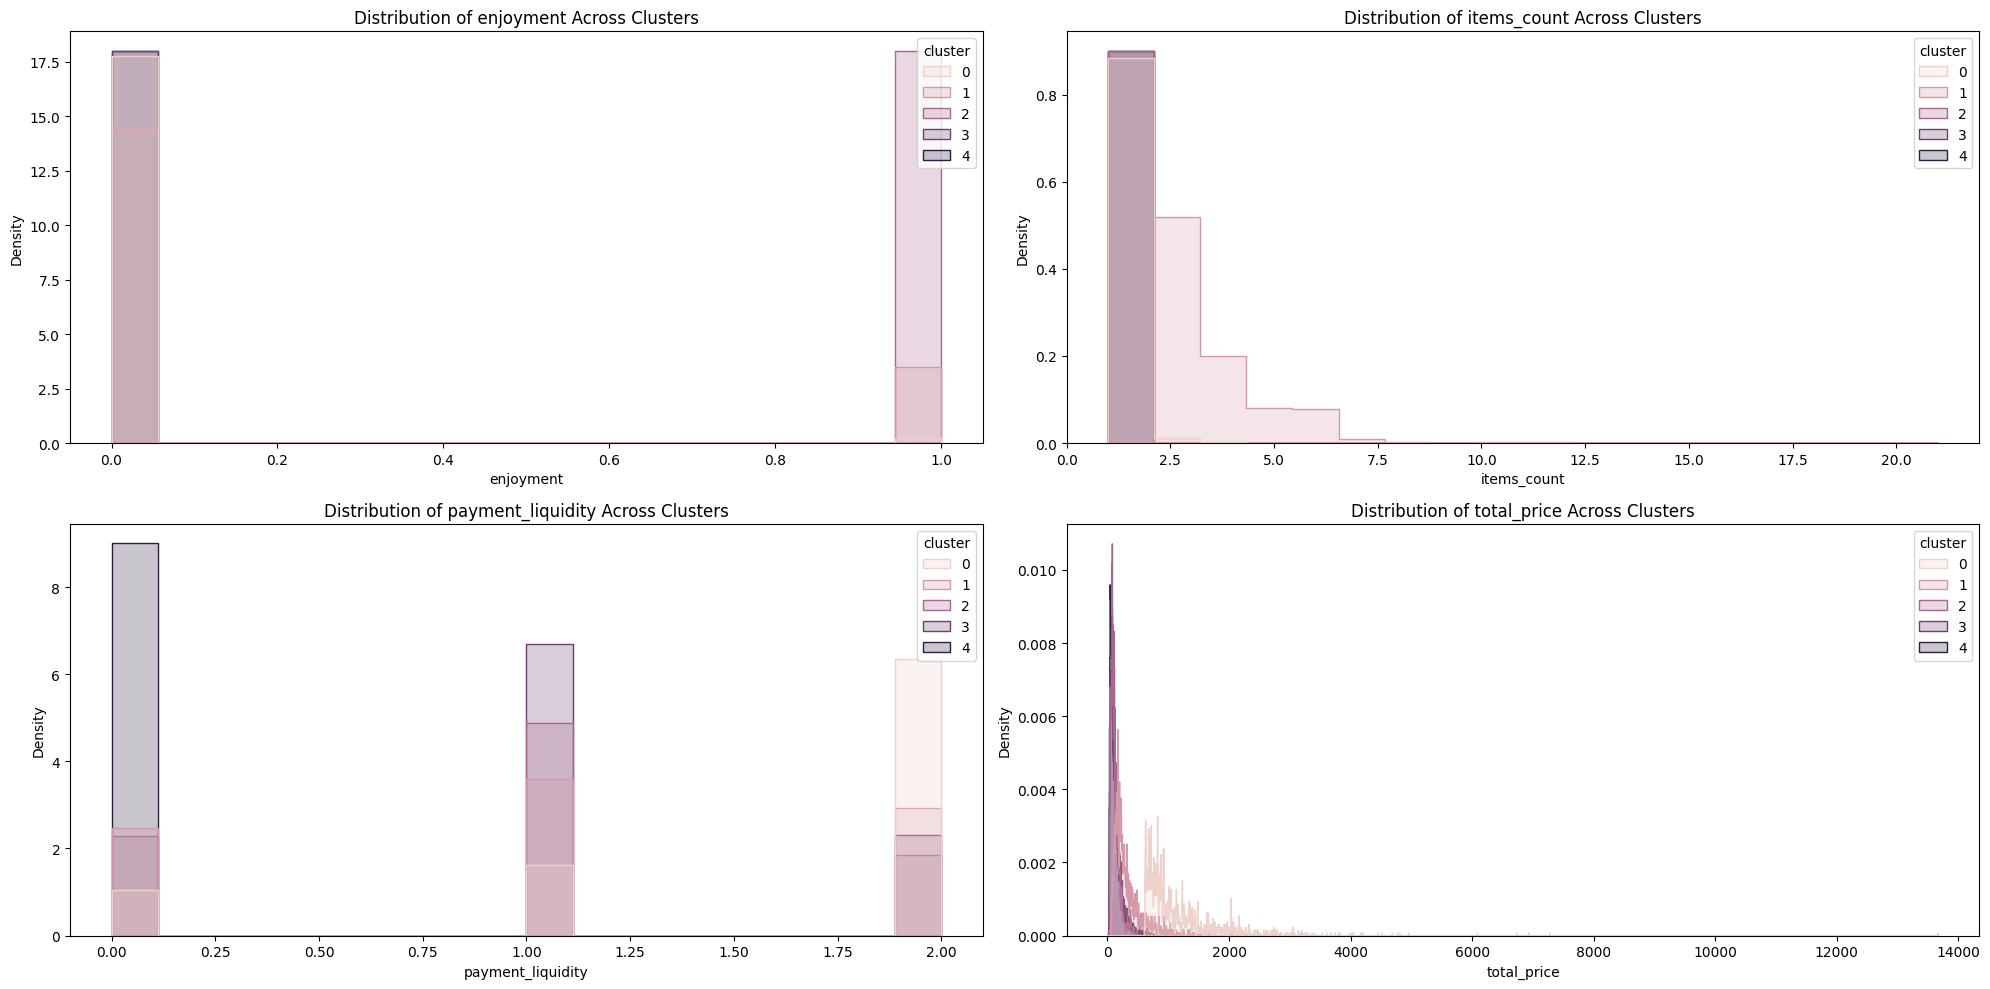

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Features to plot
features_to_plot = ['enjoyment', 'items_count', 'payment_liquidity', 'total_price']

# Create a dataframe copy for plotting to avoid SettingWithCopyWarning
plot_df = merged_features_with_time_df[features_to_plot + ['cluster']].copy()

# Plotting histograms for each feature per cluster
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=plot_df, x=feature, hue="cluster", element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.tight_layout()

plt.show()


#### Chart of absolute (monthly) changes of each cluster and changes in CPI

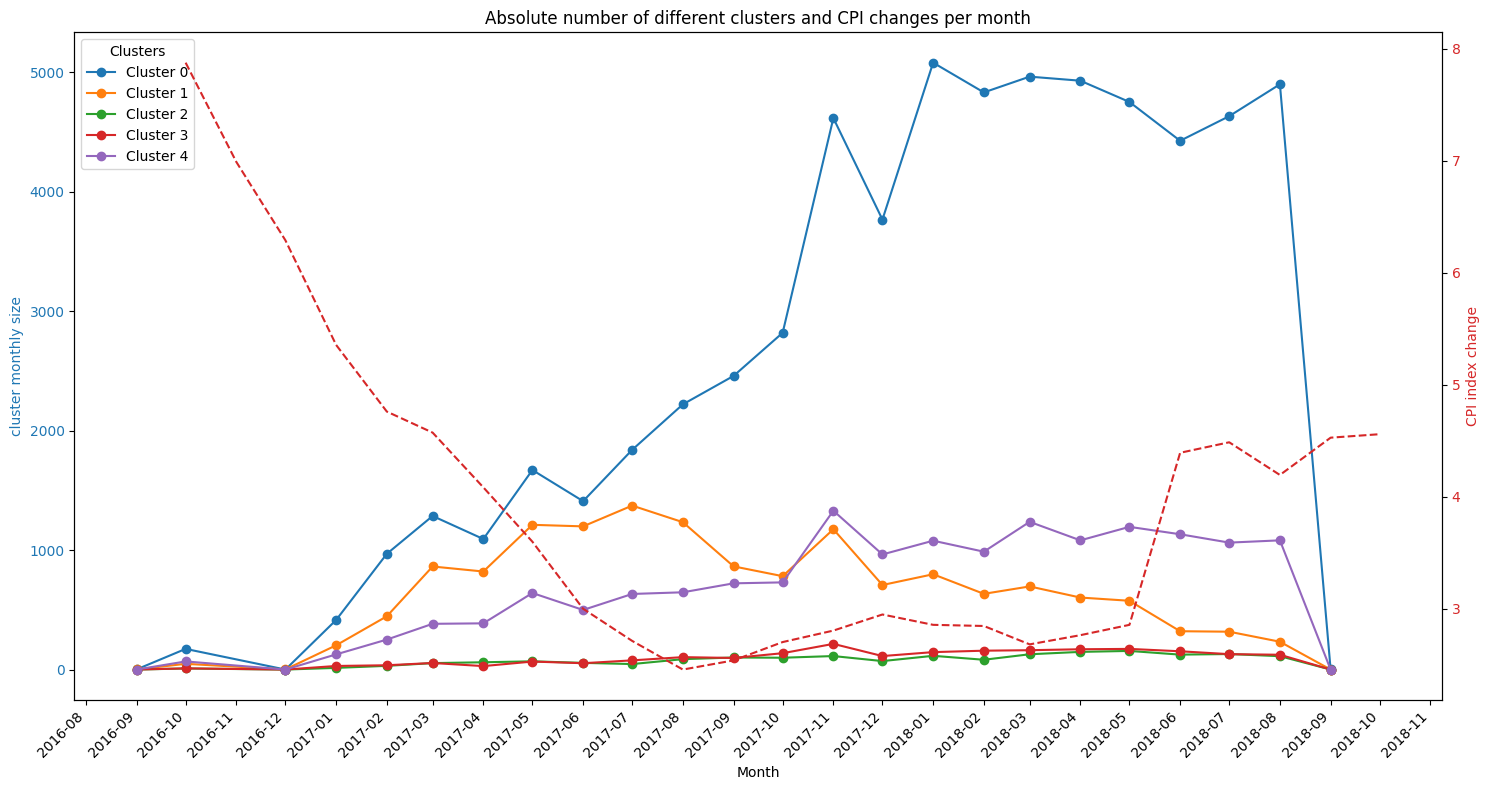

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

file_path_cpi = 'Cluster analysis/filter_cpi_data.csv'
file_path_clusters = 'Cluster analysis/merged_features_with_time_df.csv'

# cpi data
cpi_data = pd.read_csv(file_path_cpi)
clusters_data = pd.read_csv(file_path_clusters)

cpi_data['Month'] = pd.to_datetime(cpi_data['Month'])

# cluster data
clusters_data['year_month'] = pd.to_datetime(clusters_data['year_month'])
cluster_counts = clusters_data.groupby(['year_month', 'cluster']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(15, 8))

for cluster in cluster_counts.columns:
    ax1.plot(cluster_counts.index, cluster_counts[cluster], label=f'Cluster {cluster}', marker='o')

ax1.set_xlabel('Month')
ax1.set_ylabel('cluster monthly size', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left', title='Clusters')

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# create dual x-axis for CPI data
ax2 = ax1.twinx()
ax2.plot(cpi_data['Month'], cpi_data['Consumer Price Index'], color='tab:red', linestyle='--', label='CPI index')
ax2.set_ylabel('CPI index change', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Absolute number of different clusters and CPI changes per month')
plt.tight_layout()
plt.show()